Loading modules

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

Q1) answer:

In [3]:
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url, 
                         compression='gzip', #decompress gzip
                         header=None, #use no header information from the csv                         
                         parse_dates=[1]) # option for parsing dates

Q2) answer:

In [4]:
df_weather = df_weather.iloc[:,:4] # select only first four columns

column_names = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather.columns = column_names # set column names

df_weather.obs_value = df_weather.obs_value / 10 # convert last digit to decimal

Q3) answer:

In [5]:
select_stat = df_weather.station == 'ITE00100550' # boolean: first weather station
select_tmax = df_weather.obs_type=='TMAX' # boolean: maximal temp.

df_select = df_weather[select_stat & select_tmax].copy() # row selection - require both conditions

Q4) answer:

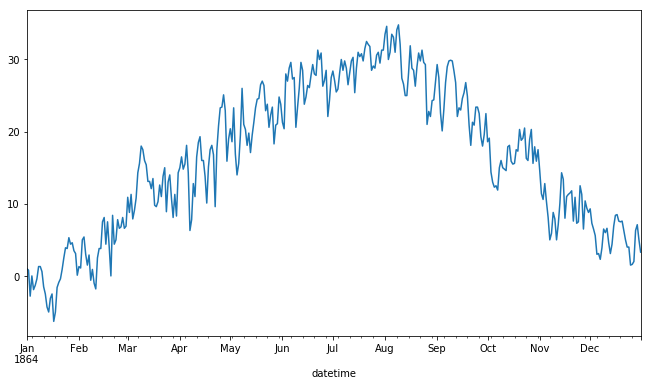

In [6]:
df_select\
    .set_index(['datetime'])\
    .obs_value\
    .plot(figsize=(11,6))


Q5) answer:

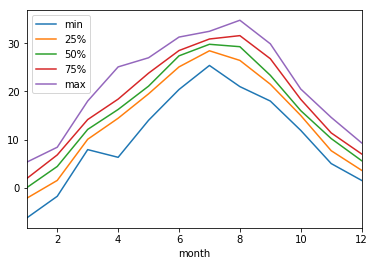

In [9]:
df_select['month'] = df_select.datetime.dt.month # access month method for the datetime methods

# make the monthly plot of describe output
df_select\
    .groupby('month')\
    .obs_value\
    .describe()\
    .iloc[:,-5:]\
    .plot()


Q6) answer:

In [7]:
prefix = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/'
suffix = '.csv.gz'

def fetch_format_weather(year):
    url = prefix + str(year) + suffix
    
    df_weather = pd.read_csv(url, 
                             compression='gzip', #decompress gzip
                             header=None, #use no header information from the csv                         
                             parse_dates=[1]) # option for parsing dates

    df_weather = df_weather.iloc[:,:4] # select only first four columns

    column_names = ['station', 'datetime', 'obs_type', 'obs_value']
    df_weather.columns = column_names # set column names

    df_weather.obs_value = df_weather.obs_value / 10 # convert last digit to decimal
    
    return df_weather


Q7) answer:

In [8]:
dfs = []
for year in range(1864, 1868): # for years 1964, 1965, 1966, 1967
    dfs.append(fetch_format_weather(year)) # apply our function and append to dfs
    
df_concat = pd.concat(dfs, ignore_index=True) # concatenate dfs into one dataframe

Q8) answer:

In [9]:
url_stats = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt"
df_stats = pd.read_fwf(url_stats, header=None).iloc[:,:4]
df_stats.columns = ['station', 'latitude', 'longitude', 'altitude']
df_concat_coords = df_concat.merge(df_stats)

Q9) answer:

Our data is not in the (date,station) format for observations. It is actually excessively long and need to be widened. 

We can convert our DataFrame of weather data into observations of (date, station) as follows:

In [20]:
df_concat_tidy = df_concat\
                    .set_index(['station','datetime','obs_type'])\
                    .obs_value\
                    .unstack(level=2)\
                    .reset_index()

Q10) answer:

In [21]:
for temp_col in ['TMAX', 'TMIN']:
    df_concat_tidy[temp_col+'_f'] = (df_concat_tidy[temp_col]*1.8)+32